<a href="https://colab.research.google.com/github/Claudiap9/QualityRedWine/blob/main/Red_Wine_Quality_ClaudiaP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BDI 475 Final Project: Red Wine Quality

For this project I will be analyzing what determines the "Quality" of red wine. The input variables are the psysicochemical properties of wine and the quality is determined by a rating out of 10. Below is a brief explanation of each variable and the role it plays in the wine.

1 - **fixed acidity:**
Majority of the acid contained in wine, which also does not evaporate

2 - **volatile acidity:**
Acetic acid in wine (high levels can lead to unpleasant vinigar flavor)

3 - **citric acid:**
Adds freshness to the flavor (found in small amounts)

4 - **residual sugar:**
Remaining sugar after fermentation

5 - **chlorides:**
Amount of salt

6 - **free sulfur dioxide:**
free form of SO2 (prevents microbial growth and the oxidation of wine)

7 - **total sulfur dioxide:**
free and bound forms of SO2

8 - **density:**
the density of wine compared to water (depends on alchohol and sugar levels)

9 - **pH:**
Describe how acidic the wine is on a scale of 0 to 14

10 - **sulphates:**
wine additive which can contribute to sulfur dioxide gas levels (acts as an antimicrobial and antioxidant)

11 - **alcohol:**
alcohol levels by percentage

12 - **quality:**
score between 0 and 10 

###I will be analyzing the data and answering the following questions:


1.   How are each variables distributed?
2.   What are some issues with the data that could affect the analysis?
3.   Which properties are correlated to quality? How are they correlated?
4.   What is the best way to group the data to analyze "good" wine?
5.   What is the main differwence between "good" and "bad" wine?




In [1]:
if 'google.colab' in str(get_ipython()):

    !pip install plotly==4.14.3
    !pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io

In [2]:
df_wine = pd.read_csv('https://github.com/Claudiap9/QualityRedWine/raw/main/winequality-red.csv')

In [3]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Below shows the type of variables each column has in the data. Most are float type, but quality is an integer. There are also 12 columns and 1599 rows.

In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df_wine.shape

(1599, 12)

##Evaluating the Output Variable (Quality)
* What is the range of the the quality score in the data?
* What are some concerns I should keep in mind about the output of the data?



In [6]:
df_wine.quality.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [7]:
fig_quality = px.histogram(df_wine,
                                  x = 'quality',
                                  title = 'Range of Quality Score')
fig_quality.show()

The quality of wine in this data ranges from 3 to 8, with a mean of 5.64.
A couple points I should consider while evaluating this data set are:
* The scores are based on the sensory data and therefore can be subjective
* The number of data for wine with a quality score of 5 and 6 are a lot higher than the number of data for scores 3,4,7 and 8
* Since the data lacks scores showing "really good" or "really bad" wine, there could be an issue with accuracy when analyzing which properties determine good quality wine. 

## Finding Properties Correlated to Quality
In order to figure out what properties negatively or positively correlate with the quality score of wine, I will be making a bar graph comparing each property to the quality of wine. 

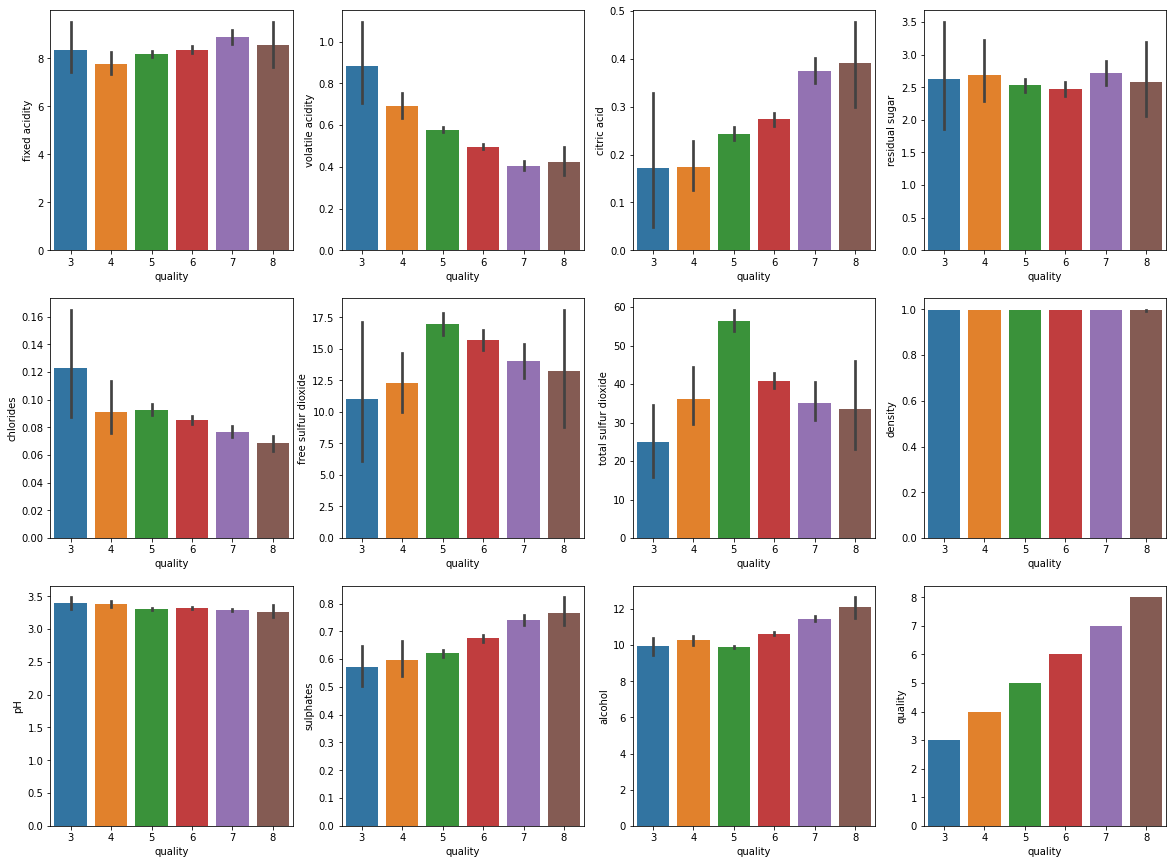

In [8]:
columns = list(df_wine.columns)
a = 3    # number of rows
b = 4    # number of columns
c = 1    # First subplot

fig = plt.figure(figsize=(20,15))

for i in columns:
    plt.subplot(a, b, c)
    plt.ylabel(i)
    plt.xlabel('quality')
    sns.barplot(x = df_wine['quality'], y = df_wine[i])
    c = c + 1

plt.show()




In [9]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The above bar graph shows:
* Citric acid, sulphates and alcohol have a positive correlation with quality
* Volatile acidity and chlorides have a negative correlation
* Fixed acidity, residual sugar, density and pH are nearly the same throughout different qualities of wine


## "Good" or "Bad" wine

Since this data is based on a scale of 0 to 10, I will be grouping the data by "good" or "bad" based on the quality score. A quality score above 6.5 will be considered "good", while a score below 6.5 will be considered "bad". To split the data, there will be a new column with bolean variables named quality_good and the output will be 1 == True if the quality is "good" and otherwise 0.





In [10]:
df_wine.loc[df_wine['quality'] >= 7, 'good quality'] = 'True'
df_wine.loc[df_wine['quality'] < 7, 'good quality'] = 'False'

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


To check the column 'good quality' is recorded correctly:

In [11]:
df_wine.sort_values(by = ['quality'], ascending = True, inplace = True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,False
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,False
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,False
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,False
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,False


In [12]:
df_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good quality
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,True
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8,True
1090,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,True
1449,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8,True
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.4,8,True


Summary of "Good" wine VS other wine

For a better idea of the difference between the wine that scored 7 and above and the wine that didn't. Below, I grouped the "good" quality wine and displayed the mean of each variable. For easier viewing, I have not displayed the properties that seem to show values similar throughout the quality scores. 

In [13]:
df_by_good = df_wine.groupby('good quality', as_index = False).agg({
    'volatile acidity' : ['count', 'mean'],
    'citric acid' : 'mean', 
    'chlorides' : 'mean',
    'free sulfur dioxide' : 'mean',
    'total sulfur dioxide' : 'mean',
    'sulphates' : 'mean',
    'alcohol' : 'mean'
})

df_by_good.columns = ['good quality', 'count', 'avg_volatile acidity', 'avg_citric acid', 'avg_chlorides', 'avg_free sulfur dioxide', 'avg_total sulfur dioxide', 'avg_sulphates', 'avg_alcohol']

df_by_good.head(2)

,good quality,count,avg_volatile acidity,avg_citric acid,avg_chlorides,avg_free sulfur dioxide,avg_total sulfur dioxide,avg_sulphates,avg_alcohol
0,False,1382,0.547022,0.254407,0.089281,16.172214,48.285818,0.644754,10.251037
1,True,217,0.405530,0.376498,0.075912,13.981567,34.889401,0.743456,11.518049


To compare Good quality wine with other wine that scored below 7, I have created a box plot to see the difference in distribution for each variable. I have only compared the variables shown in the above table, as other variables not shown above seem to show no distinct correlation to quality.

In [14]:
fig_volatile_acidity = px.box(df_wine,
                      x = 'volatile acidity',
                      y = 'good quality',
                      orientation = 'h',
                      title = 'Difference in Volatile Acidity between Good Quality Wine (>=7) and Others')

fig_volatile_acidity.show()

In [15]:
fig_citric_acid = px.box(df_wine,
                      x = 'citric acid',
                      y = 'good quality',
                      orientation = 'h',
                      title = 'Difference in Citric Acid between Good Quality Wine (>=7) and Others')

fig_citric_acid.show()

In [16]:
fig_chlorides = px.box(df_wine,
                      x = 'chlorides',
                      y = 'good quality',
                      orientation = 'h',
                      title = 'Difference in Chlorides between Good Quality Wine (>=7) and others')

fig_chlorides.show()

In [17]:
fig_free_sd = px.box(df_wine,
                      x = 'free sulfur dioxide',
                      y = 'good quality',
                      orientation = 'h',
                      title = 'Difference in Free Sulfur Dioxide between Good Quality Wine (>=7) and Others')

fig_free_sd.show()

In [18]:
fig_total_sd = px.box(df_wine,
                      x = 'total sulfur dioxide',
                      y = 'good quality',
                      orientation = 'h',
                      title = 'Difference in Total Sulfur Dioxide between Good Quality Wine (>=7) and Others')

fig_total_sd.show()

In [19]:
fig_sulphates = px.box(df_wine,
                      x = 'sulphates',
                      y = 'good quality',
                      orientation = 'h',
                      title = 'Difference in Sulphates between Good Quality Wine (>=7) and Others')

fig_sulphates.show()

In [20]:
fig_alcohol = px.box(df_wine,
                      x = 'alcohol',
                      y = 'good quality',
                      orientation = 'h',
                      title = 'Difference in Alcohol between Good Quality Wine (>=7) and Others')

fig_alcohol.show()

The above box plots show that good wine have more citric acid, suphates and alcohol than other lower scoring wine. The only variable that is shown to have a negative correlation is volatile acidity, where there tends to be less volatile acidity in good quality wine. However, there isn't a distinct difference between the "good" wine compared to the other wine, and the box plots for wine scoring below 7 have shown a lot of outliers and bigger range.

## good average and bad
In many cases the mean, median, range of wine with the score of 7 and above have shown to have similar properties. However, wine with a quality score of less than 7 does not neccesarily mean they are all bad, there are average tasting wine too. I want to see if there are bigger differences when it comes to "good and "bad" wine. "average" tasting wine will have a score of 5&6, while "bad" will be 3&4, "good" wine will still have a score of 7&8. 

In [21]:
df_wine.loc[(df_wine['quality'] == 7) | (df_wine['quality'] == 8), 'good_avg_bad'] = 'good'
df_wine.loc[(df_wine['quality'] == 6) | (df_wine['quality'] == 5), 'good_avg_bad'] = 'average'
df_wine.loc[(df_wine['quality'] == 4) | (df_wine['quality'] == 3), 'good_avg_bad'] = 'bad'


df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good quality,good_avg_bad
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,False,bad
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,False,bad
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,False,bad
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,False,bad
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,False,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,True,good
1403,7.2,0.330,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8,True,good
1090,10.0,0.260,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,True,good
1449,7.2,0.380,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8,True,good


Below, is a pie chart made to visualize the data distribution of the column good_avg_bad. 

In [22]:
fig_good_avg_bad = px.pie(df_wine,
                          names = 'good_avg_bad',
                          title = 'Percentage of Good, Average and Bad Wine Recorded')
fig_good_avg_bad.show()

Below are the box plots comparing the good, average and bad wine for each variable. 

In [23]:
fig2_volatile_acidity = px.box(df_wine,
                      x = 'volatile acidity',
                      y = 'good_avg_bad',
                      orientation = 'h',
                      title = 'Difference in Volatile Acidity between Good, Average and Bad Quality Wine',
                      points = 'all')

fig2_volatile_acidity.show()

There is a negative correlation between quality and volatile acidity. The "good" wine show the lowest range in volatile acidity, with a median value of 0.37. The "bad" wine show the highest range in volatile acidity, with a median value of 0.68. This shows that volatile acidity is low in most good quality wine.

In [24]:
fig2_citric_acid = px.box(df_wine,
                      x = 'citric acid',
                      y = 'good_avg_bad',
                      orientation = 'h',
                      title = 'Difference in Citric Acid between Good, Average and Bad Quality Wine',
                      points = 'all',
                      )

fig2_citric_acid.show()

There is a positive correlation between quality and citric acid. The "good" wine show a very wide range in citric acidity, but has a very high median value of 0.4. The "bad" wine show a smaller range in citric acidity, but has a very low median value of 0.08. This shows that citric acid levels are high in most good quality wine.

In [25]:
fig2_chlorides = px.box(df_wine,
                      x = 'chlorides',
                      y = 'good_avg_bad',
                      orientation = 'h',
                      title = 'Difference in Chlorides between Good, Average and Bad Quality Wine',
                      points = 'all')

fig2_chlorides.show()

There seems to be no difference in chloride levels between good and bad quality wine.

In [26]:
fig2_free_sd = px.box(df_wine,
                      x = 'free sulfur dioxide',
                      y = 'good_avg_bad',
                      orientation = 'h',
                      title = 'Difference in free sulfur dioxide between Good, Average and Bad Quality Wine',
                      points = 'all')

fig2_free_sd.show()

There seems to be no difference in free sulfur dioxide between good and bad quality wine.

In [27]:
fig2_total_sd = px.box(df_wine,
                      x = 'total sulfur dioxide',
                      y = 'good_avg_bad',
                      orientation = 'h',
                      title = 'Difference in total sulfur dioxide between Good, Average and Bad Quality Wine',
                      points = 'all')

fig2_total_sd.show()

There seems to be no difference in total sulfur dioxide between good and bad quality wine.

In [28]:
fig2_sulphates = px.box(df_wine,
                      x = 'sulphates',
                      y = 'good_avg_bad',
                      orientation = 'h',
                      title = 'Difference in sulphates between Good, Average and Bad Quality Wine',
                      points = 'all')

fig2_sulphates.show()

There is a positive correlation between quality and sulphates. The "good" wine show a higher range in sulphates, and has a very high median value of 0.74. The "bad" wine show a smaller range in sulphates,and has a low median value of 0.56. This shows that sulphate levels are high in most good quality wine.

In [29]:
fig2_alcohol = px.box(df_wine,
                      x = 'alcohol',
                      y = 'good_avg_bad',
                      orientation = 'h',
                      title = 'Difference in alcohol between Good, Average and Bad Quality Wine',
                      points = 'all')

fig2_alcohol.show()

There is a positive correlation between quality and alcohol percentage. The median alcohol percentage is higher in good quality wine, with a value of 11.6. The median alcohol percentage is lower in bad quality wine, with a value of 10. 

##Conclusion
For this project, my goal was to have a better understanding of what makes red wine a GOOD quality wine and I have discovered a few attributes that define a certain wine as good quality. Here is a summary of what I have found:


1.   Lower volatile acidity is best in wine (less vinegar flavor in wine is prefered) 
2.   High citric acid is very high in good quality wine (wine with high levels of citric acid have a fresher taste, which seems to be prefered in wine)
3.   Sulphates are higher in good wine (more antimicrobial and antioxidant are in good wine)
4.   Alcohol levels tend to be higher in better quality wine



